<a href="https://colab.research.google.com/github/AlexUmnov/genai_course/blob/main/week1_genai_api/seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this week's practice session and homework you will:

- Learn to make API calls to some of the popular generative models working with text, images and audio.
- Understand the basics of few-shot learning and prompt engineering.

# Introduction

Generative models like ChatGPT or Stable Diffusion are capable of doing great things, but you can't actually run them on your servers. So, there are two options:
- Use open source models that are usually somewhat less capable than the top proprietary ones.
- Use the most powerful models by API.

In this part of the course we will concentrate on the second option.

# Prerequisite: working with APIs basics

We'll start by getting acquainted with the `requests` library. It's widely used to call url's, access api's, etc. You can jump to the next section **Tasks you can solve with LLMs** if you're already good with API

### URL requests basic

There are two main types of request you can make to a server:

- `POST` requests ask a web server to accept the data. For example, it can be used to update a database.

- `GET` requets are used to receive information from the server.

In this practice session we will only use `GET` requests, since we only want to call an api and receive a response.

Let's practice using `requests` by calling to the API of `catfact.ninja` web resource that return a random fact about cats.

In [1]:
import requests

r = requests.request("GET", "https://catfact.ninja/fact")

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


It's always good to check the status code. The right one is `201`, others usually indicate various kinds of errors, see https://en.wikipedia.org/wiki/List_of_HTTP_status_codes for reference.

In [2]:
r.status_code

200

By accessing the `content` attribute of our request we can see what answer the server returned us

In [3]:
r.content

b'{"fact":"Tabby cats are thought to get their name from Attab, a district in Baghdad, now the capital of Iraq.","length":100}'

API's usually return information in some structured formats like JSON, YAML, ProtoBuf, etc. As we can see, in this case the response is JSON encoded. So let's decode it and see what we got!

In [4]:
import json

json.loads(r.text)

{'fact': 'Tabby cats are thought to get their name from Attab, a district in Baghdad, now the capital of Iraq.',
 'length': 100}

If something goes wrong, the `get` function will return an error message with an error code. For example, if we send request to a non-existing address, we'll get:

In [5]:
r = requests.request("GET", "https://catfact.ninja/facta")
r.content, r.status_code

(b'{"message":"Not Found","code":404}', 404)

### Working with API

The next two important things we need to learn is:

1. How to authorize ourselves with an API key.

2. How to request specific information from a server and not just a random thing.

Let's try that using [TheDogAPI](https://thedogapi.com/), a simple API created for educational purposes. It is free to try, but requires registration by email. It will provide you with an API key after registration.

When you've registered, create a file `.dog-api-key` in the directory where you're working now and put the API key there

In [6]:
with open('.dog-api-key') as api_file:
    dog_api_key = api_file.read().strip()

TheDogAPI provides several services. For example, we can get a picture of a dog belonging to a specific breed. Let's analyze the code that is doing it:

In [7]:
url = "https://api.thedogapi.com/v1/images/search?format=json"

params = {"breed_ids": [10]}
headers = {
  'Content-Type': 'application/json',
  'x-api-key': dog_api_key
}

response = requests.request(
    "GET", url, headers=headers, params=params
)

You're already familiar with the `requests` call. Now we also pass:

- `headers` containing metadata such as the type of content and the API key.
- `params` containing whatever parameters the API expects from us. In this case we need to provide the id of a breed (`10` means American Bulldog).

If you want to know more about TheDogAPI, feel free to browse the documentation: https://documenter.getpostman.com/view/5578104/2s935hRnak#9e7e4cf9-0e0a-4258-8ace-ed1862843c96

Let's check if everything went ok. As a top-level verification we can check the status code, it should be 200

In [8]:
response.status_code

200

If the code is 200, we can check the breed name and see a photo of an American Bulldog

Breed Name:  American Bulldog


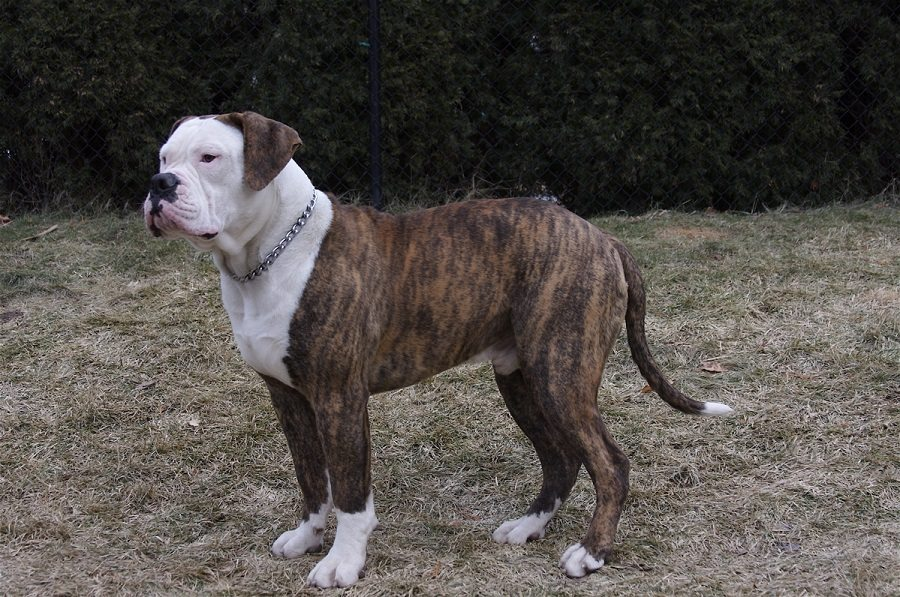

In [9]:
from IPython.display import Image

dog_json = json.loads(response.text)
print("Breed Name: ", dog_json[0]['breeds'][0]['name'])
Image(dog_json[0]['url'], height=256)

Congrats, we mastered calling the APIs and ready to get on with the real calls.

# Tasks you can solve with LLMs

In this section we will browse through several text-related generative tasks.

Large Language Models (LLMs) can already solve a vast variety of different tasks, and they continue to improve. This illustration can help you to appreciate the history of LLMs:

<img src="https://github.com/Mooler0410/LLMsPracticalGuide/blob/main/imgs/tree.jpg?raw=true"  width="60%" height="60%">


Many API options are available. We'll use the [OpenAI platform](https://platform.openai.com/) which is one of the most popular and powerful.



### OpenAI API basics

OpenAI API requires registration and moreover it is commercial (but hopefully quite affordable at least on the scale required at our course). So please don't forget to register, acquire the API key and save it to `.open-ai-api-key file` in your working directory.

With the API key we can just call the API, but OpenAI has a special convenient library:

In [10]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 646.4 kB/s eta 0:00:00a 0:00:01
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached httpcore-1.0.2-py3-none-any.whl.metadata (20 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 2.5 MB/s eta 0:00:00
Using cached httpcore-1.0.2-py3-none-any.whl (76 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.0 MB/s eta 0:00:00a 0:00:01m
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)


We need to load the API key into it:

In [11]:
import openai
openai.api_key = open(".open-ai-api-key").read().strip()

Now we're ready to harness the power of GPT!

Let's try something simple:

In [14]:
chat_completion = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": "Hello world"}]
)
chat_completion

ChatCompletion(id='chatcmpl-8jotpiQqwb24wi6IoEBOdFeSggE6P', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Hello! How can I assist you today?', role='assistant', function_call=None, tool_calls=None))], created=1705931109, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=9, prompt_tokens=9, total_tokens=18))

Let's analyze the API call and the output.

We need to input:

1) **Model name**, you can choose from https://platform.openai.com/docs/models/, just mind the pricing.

2) **Conversation history**. Unlike the web version of ChatGPT which memorizes your conversations, with API you need to provide the background story. We'll talk a more about it a bit later.

The output contains a `message` of the *assistant* (that's how an OpenAI module presents itself) and indicates that the generation ended naturally because the message was complete (`"finish_reason"` is `"stop"`).

The actual responce of the model can be obtained as:

In [15]:
model_answer = chat_completion.choices[0].message.content
model_answer

'Hello! How can I assist you today?'

Let's write a single shortcut function that takes a prompts and returns a completion suggested by the model:

In [16]:
# Write a function which for a given text returns ChatGPT 3.5 reponse
def get_chatgpt_answer(message: str) -> str:
    pass

In [17]:
def get_chatgpt_answer(message: str) -> str:
    chat_completion = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": message}]
    )
    return chat_completion.choices[0].message.content

In [18]:
get_chatgpt_answer("Hello World!")

'Hello! How can I assist you today?'

The API also provides statistics of token `usage`. It can be important for you because OpenAI bills you based on the number of tokens its models process for you.

Note that tokens are not the same as words, they are subword units of sort. You will deal with them in more detail in the homework.

You can control the length of the model answer with the `max_tokens` parameter. For example:

In [19]:
chat_completion = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=5,
    messages=[
        {
            "role": "user",
            "content": "Please generate a long sentence"
        }
    ]
)
chat_completion

ChatCompletion(id='chatcmpl-8jouuqv29JJOQOJd1bT3ixF0JxJCG', choices=[Choice(finish_reason='length', index=0, logprobs=None, message=ChatCompletionMessage(content='As I walked through the', role='assistant', function_call=None, tool_calls=None))], created=1705931176, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=5, prompt_tokens=12, total_tokens=17))

Please note that `"finish_reason"` is now `"length"` which means that `max_tokens` was reached before the generation stopped naturally.

You can't ask the model to generate a text of arbitrary length. Each model has a restriction on a total number of tokens in **prompt + completion**. For example, it's 4,096 tokens for `gpt-3.5-turbo`. You can find the restrictions for each model at the [OpenAI model reference page](https://platform.openai.com/docs/models/gpt-3-5).

### Roles and communication history

With `openai` library you can pass more than a prompt to the API. The `messages` parameter takes a list of messages with several possible roles, among them:

- `"user"`, that's you.
- `"assistant"`, a model's cue.
- `"system"` used to pass our wishes regarding the assistant's tone of voice, restrictions etc.

Let's look at a toy example. We can use `"system"` input to make a model only answer in rhymes:

In [20]:
MODEL = "gpt-3.5-turbo"
response = openai.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant" \
                "and you only answer in rhymed sentences."
        },
        {
            "role": "user",
            "content": "I need to write some code but "
                "I'd prefer to go for a stroll."},
    ]
)

print(response.choices[0].message.content)

To write code, focus and concentration are key,
But a stroll may help you find inspiration and glee.
So why not take a walk, embrace the fresh air,
Then return to your code with a mind so clear.


Another useful way to utilize `system` is to ask for answers in a structured format, for example json.

In [21]:
MODEL = "gpt-3.5-turbo"
response = openai.chat.completions.create(
    model=MODEL,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant" \
                "and you only answer in json format."
        },
        {
            "role": "user",
            "content": "I need to write some code but "
                "I'd prefer to go for a stroll."},
    ]
)

response.choices[0].message.content

'{\n  "response": "That sounds like a great idea! Go for your stroll and enjoy some fresh air. When you\'re ready to start coding, just let me know and I\'ll be here to assist you."\n}'

Another way of changing the tone of voice of the model is showing some actual examples. Let's make our AI optimist provide short slogan-ish answers:

In [22]:
MODEL = "gpt-3.5-turbo"
response = openai.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content":
         "You are a helpful assistant and you are sure that Generative AI can solve any problem."},
        {"role": "user", "content":
         "HR specialists spend too much time writing letters to the candidates."},
        {"role": "assistant", "content":
         "We should create a Generative AI-powered mailing bot to help them!"},
        {"role": "user", "content":
         "I want to submit a paper to NeurIPS, but I don't have time to write it."},
        {"role": "assistant", "content":
         "Just generate something with ChatGPT and become a NeurIPS star!"},
        {"role": "user", "content":
         "My child should draw a picture for tomorrow's art lesson, but doesn't have inspiration for this."},
        {"role": "assistant", "content":
         "Don't worry, you can generate something with a diffusion model!"},
        {"role": "user", "content":
         "I need to write some code by I'd prefer to go for a stroll."},
    ]
)

response.choices[0].message.content

'No problem! Use a code generation model like Codex to write the code for you while you enjoy your walk.'

So, we've taught our assistant to exhibit certain behavior without actual training just by showing some examples in a prompt. This is an example of **few-shot learning**.

**Note 1**. Please don't mistake the recommendations of this assistant as actual advice. Applying AI to real-world problems should come in an ethical and safe way. For example, we need to make sure that an HR-mailing bot produces no offensive, biased or incoherent answers before it comes to production, and this can be very tricky.

**Note 2**. Actually we can do the same thing in one `"user"` message, like:

```
You are a helpful assistant and you are sure that Generative AI can solve any problem.

Q: HR specialists spend too much time writing letters to the candidates.
A: We should create a Generative AI-powered mailing bot to help them!
Q: I want to submit a paper to NeurIPS, but I don't have time to write it.
A: Just generate something with ChatGPT and become a NeurIPS star!
Q: My child should draw a picture for tomorrow's art lesson, but doesn't have inspiration for this.
A: Don't worry, you can generate something with a diffusion model!
Q: I need to write some code by I'd prefer to go for a stroll.
A:
```

Moreover, this can actually work better, especially in some older models.

We'll discuss few-shot learning more next week.

## Summarization


For this task we will use openai api, so make sure that you have your key in `.open-ai-api-key` file

In the practice folder you can find a file `wikipedia_article.txt` with contents of Wikipedia article about paws.

You can take a look at it yourself, but if you don't have much time, you can ask GPT to summarise it for us. To do this, we feed to the API the text of the article together with a specific prompt indicating which task we want the model to solve.

In [23]:
def summarise_with_gpt(text: str):
    return get_chatgpt_answer(
        f"Write a short summary of the following text.\n{text}"
    )

In [24]:
article = open("wikipedia_article.txt").read()

summarise_with_gpt(article)

"The paw is a common characteristic among various animals and is made up of pads and claws. The pads act as a cushion for the animal's limbs and are typically hairless with a thin, pigmented, keratinised, and epidermis covering subcutaneous tissue. The paw consists of a large heart-shaped pad and generally four load-bearing pads, although some animals may have additional toes or dewclaws. The paw also includes a claw on each digit, and some animals may have fur on the soles of their paws. Animals with paws include felids, canids, rabbits, bears, raccoons, weasels, and rodents."

You can check that this is really a coherent summary.

If you modify the prompt, you can add a specific flavor to the summary. For example, you can ask the model to do it in simple English avoiding scientific terminology (try it!).

You can also control the length of the summary using prompt like: `"Summarize the following text in 2-3 sentences."` Typically, the more precise your prompt is, the more stable the results you get.

# Translation

Another task you can solve with ChatGPT is translation. Even though the quality of such translations is not the best, it's still fascinating that one model can do so many things.

In [25]:
# Write a function to translate to another language with the following signature
# You can take summarise_with_gpt as an example

def translate_with_gpt(text: str, target_language: str) -> str:
    pass

In [26]:
def translate_with_gpt(text: str, target_language: str) -> str:
    return get_chatgpt_answer(
        f"Translate the following text to {target_language}:\n"\
        f"{text}"
    )

Now let's try it in action

In [27]:
translate_with_gpt(
    "I am a language model, nice to meet you!",
    target_language="Spanish"
)

'Soy un modelo de lenguaje, ¡mucho gusto en conocerte!'

In this simple example we can already see that it gives us a different translation, compared to a dedicated translation engine. Try pasting it to Google Translate and see the difference

Now let's try to implement a more complex pipeline with ChatGPT API. In the practice directory there's a file with an article about paws, but in japanese.

Let's try to translate it to English using chatgpt API and then summarise and create a title for it.

In [28]:
def create_title_with_chat_gpt(text: str) -> str:
    return get_chatgpt_answer(
        f"Create a title for this text:\n{text}"
    )

def translate_and_summarise_with_chat_gpt(text):
    print("Making a translate request")
    translated_text = translate_with_gpt(
        text,
        target_language="English"
    )
    print('Making summarisation request')
    summarized_text = summarise_with_gpt(translated_text)
    print("making title request")
    title = create_title_with_chat_gpt(translated_text)
    return {
        "title": title,
        "original": text,
        "translated_text": translated_text,
        "summary": summarized_text
    }

In [29]:
from IPython.display import display
result = translate_and_summarise_with_chat_gpt(
    open('wikipedia_article_japanese.txt').read()
)
display(f"Title:\n{result['title']}")
display(result['summary'])

Making a translate request
Making summarisation request
making title request


'Title:\n"The Meaning and Importance of Paw Pads: A Comprehensive Guide"'

'means "Animals that have a long association with humans" in English.'

We hope that you're as curious as we are and you also wonder, what would happen if we do the same thing in a different order: summarise first, then translate. Let's try!

In [30]:
def summarise_and_translate_with_chat_gpt(text):
    print('Making summarisation request')
    summarized_text = summarise_with_gpt(text)
    print("making title request")
    title = create_title_with_chat_gpt(text)
    print("Making a translate request")
    translated_text = translate_with_gpt(
        summarized_text,
        target_language="English"
    )
    translated_title = translate_with_gpt(
        title,
        target_language="English"
    )
    return {
        "title": translated_title,
        "original": text,
        'summarized_text': summarized_text,
        "translated_text": translated_text,
        "summary": translated_text
    }

In [31]:
result = summarise_and_translate_with_chat_gpt(
    open('wikipedia_article_japanese.txt').read()
)
display(f"Title:\n{result['title']}")
display(result['summary'])
display(result['summarized_text'])

Making summarisation request
making title request
Making a translate request


'Title:\nStructure and Role of Paw Pads'

'This text provides information about the structure and function of the pads on the paws of animals, commonly referred to as "肉球" (nikukyuu) or paw pads in English. The text explains that paw pads are found mainly on the feet of animals in the order Carnivora. It further describes the different types of paw pads, including the 掌球 (shoukyuu) or metacarpal pad, which is the large central pad on the front paw, and the 足底球 (sokuteikyuu) or footpad, which is the large central pad on the hind paw. The text also mentions the role of paw pads in reducing noise when approaching prey, cushioning the impact of walking or jumping, and serving as sensory organs for cats. Different animals that have paw pads include those in the cat, dog, bear, raccoon, ferret, rodent, and marsupial families. The text also briefly mentions the popularity of paw pads as a design element in various products.'

'This text provides information about the structure and function of the pads on the paws of animals, commonly referred to as "肉球" (nikukyuu) or paw pads in English. The text explains that paw pads are found mainly on the feet of animals in the order Carnivora. It further describes the different types of paw pads, including the 掌球 (shoukyuu) or metacarpal pad, which is the large central pad on the front paw, and the 足底球 (sokuteikyuu) or footpad, which is the large central pad on the hind paw. The text also mentions the role of paw pads in reducing noise when approaching prey, cushioning the impact of walking or jumping, and serving as sensory organs for cats. Different animals that have paw pads include those in the cat, dog, bear, raccoon, ferret, rodent, and marsupial families. The text also briefly mentions the popularity of paw pads as a design element in various products.'

As we can see, the result depends on the order of summarization and translation. Moreover, if we translate after summarization, the output is somewhat less coherent.

On top of that, because we wrote the prompt in English, the summarization result is already in English.

**Note**. Even if we don't change our pipelint and use the same request several times, ChatGPT's response might differ. This is due to the fact that we cannot directly controll the random state of the model with this API. You can make generation more reproducible using the parameter `temperature` of `openai.ChatCompletion.create`. It can take values between 0 and 2 with values closer to 0 making outputs more deterministic those above 0.8 making outputs more random and creative.

If you run LLM locally (we'll do this in the second part of the course), you can make the responses deterministic by fixing the random states.

# Text to image generation

Probably all of you heard at this point about stable diffusion and text to image generation. Let's generate an image of our own.

First you need to get the api key from https://stablediffusionapi.com/

In [33]:
sd_api_key = open(".stable-diffusion-key").read().strip()

Now let's try generating something.

Be aware that the free trial plan allows to make only 20 calls to the model. You can run out of them very quickly!

In [34]:
def generate_image_with_sd(
    text_prompt: str,
    negative_prompt: str = None
):
    payload = {
        "key": sd_api_key,
        "prompt": text_prompt,
        "negative_prompt": negative_prompt,
        "width": "512",
        "height": "512",
        "samples": "1",
    }

    response = requests.post(
        url="https://stablediffusionapi.com/api/v3/text2img",
        json=payload
    )

    if not int(response.status_code) == 200:
        print(response.status_code)
        print(response.json())

    return response.json()['output'][0]

In [35]:
from IPython.display import Image

Image(url=generate_image_with_sd("a paw of a cat"))

You can quickly see the shortcomings of Stable Diffusion.

The model itself is quite advanced, but you need to be extremely specific in what you want it to draw.

(prompt was generated with ChatGPT :D)

In [36]:
prompt = "Capture the elegance and playfulness of a feline companion with your artistic flair. "\
    "Create a stunning illustration of a cat paw, showcasing its delicate beauty and intricate details. "\
    "Emphasize the gracefulness of each toe, the softness of the paw pads, and the hidden power within. "\
    "Let your creativity shine as you bring to life the essence of a cat's touch. "\
    "Whether you choose a realistic or abstract approach, express the unique personality and charm of a cat's paw "\
    "in a way that will make hearts melt. Show us the magic that happens when art and feline grace collide!"

In [37]:
Image(url=generate_image_with_sd(prompt))

Actually making a suitable prompt for a stable diffusion model is a craft in itself. Some people even earn money on selling their prompts to other: https://promptbase.com/

In case you'd like to experiment with it youself, we recommend you to use the following websites, since Stable Diffusion API has a limited amount of free requests:

- https://dreamstudio.ai/generate is the project by Stablility.AI

- https://neural.love/ is a startup which aims to give more people access to state-of-the-art ai

## Now let's dive a bit into more complicated prompting

We have already learned that by using a right prompt, we can achieve much better results. Some models also offer us what's called a negative prompt. The idea behind it, is that the model tries to generate what you've asked of it, but be as far as possible from the negative prompt.

We will demonstrated that using text to image. In those example for the sake of simplicity of the prompts, we use MidJourney. Feel free to try a similar exercies with a different engine, but beware that the prompts might get more compicated.

Let's try to create an image for the prompt

*A cat riding a camel goes through the desert*

We will get a man riding a camel

In [40]:
from IPython.display import Image

Image("content/a_man_on_a_camel.png", width=400)

If we add a negative prompt

A man riding a camel

then we'll get something better, but in our case it was a cat riding a cat-camel.

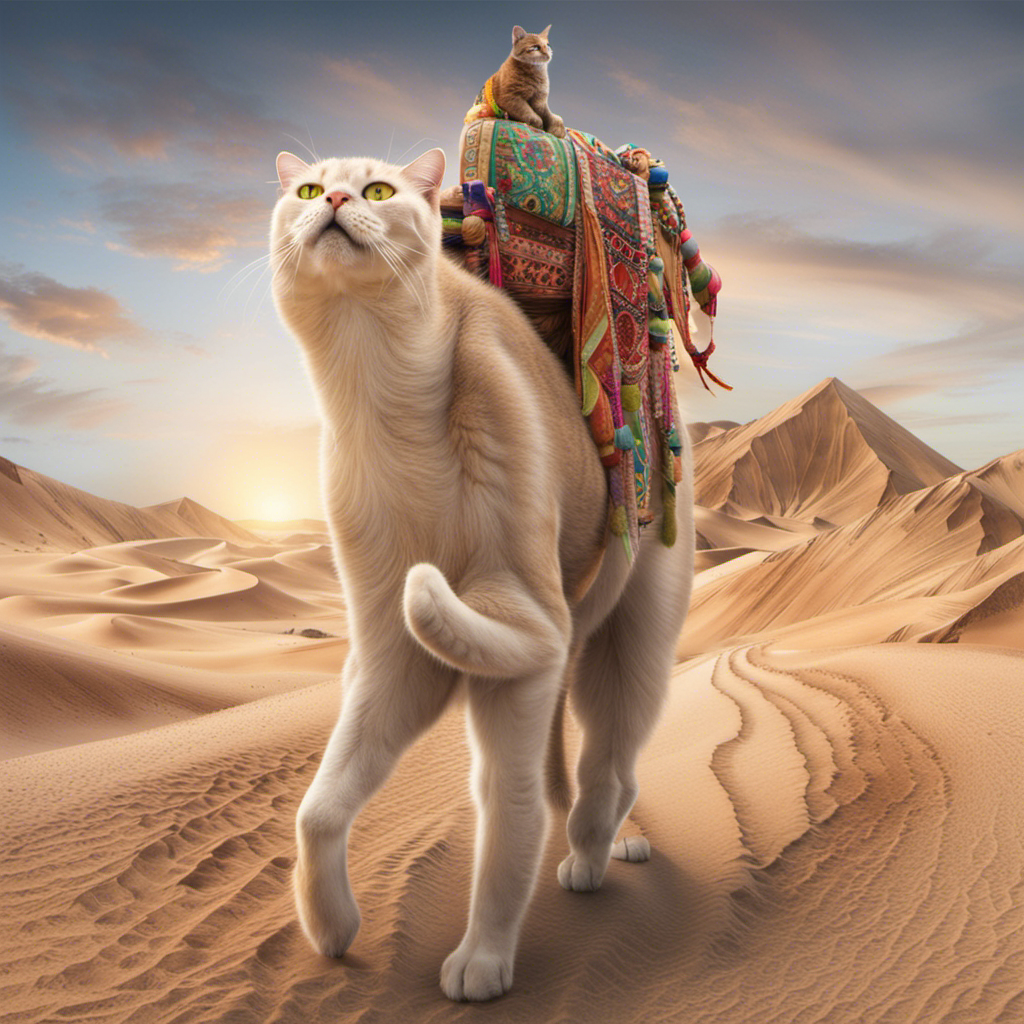

In [41]:
Image("content/a_cat_on_a_cat.png", width=400)

In this case we can add another negative prompt

A cat riding a cat

Here one of the results look like what we wanted to achieve

In [42]:
Image("content/a_cat_on_a_camel.png", width=400)

Using a combination of prompt engineering and negative prompting you can get precisely what you need from a stable-diffusion model. However, this is, as we mentioned before, a craft of it's own.

[DALL-E 3](https://openai.com/dall-e-3/) promises to simplify prompting a lot, but we're yet to see the results of it's work in full.

# Voice generation

For this an easiest tool to use that we found is PlayHT. There are alternatives by Google, for example, but their API is a bit more complicated.

Register on https://play.ht/, obtain your user ID and api key. After that, let's try to call the API

In [43]:
playht_key = open(".playht-key").read().strip()
playht_used_id = open(".playht-user-id").read().strip()

def generate_speech(text):
    response = requests.post(
        url="https://play.ht/api/v2/tts",
        headers = {
            "AUTHORIZATION": f"Bearer {playht_key}",
            "X-USER-ID": playht_used_id,
            "accept": "text/event-stream",
            "content-type": "application/json"
        },
        json = {
            "text": text,
            "voice": "larry"
        }
    )
    return json.loads(response.text.splitlines()[-2].replace("data: ", ""))['url']

In [44]:
audio_url = generate_speech("I love cats, hope you do too!")

from IPython.display import Audio

Audio(url=audio_url)

In [49]:
audio_url = generate_speech("Capture the elegance and playfulness of a feline companion with your artistic flair. Create a stunning illustration of a cat paw, showcasing its delicate beauty and intricate details. Emphasize the gracefulness of each toe, the softness of the paw pads, and the hidden power within. Let your creativity shine as you bring to life the essence of a cat's touch. Whether you choose a realistic or abstract approach, express the unique personality and charm of a cat's paw in a way that will make hearts melt. Show us the magic that happens when art and feline grace collide!")

from IPython.display import Audio

Audio(url=audio_url)

We won't delve into audio generation in this course. If you want to learn more about using AI for audio processing and generation, you can take a look at this course https://huggingface.co/learn/audio-course/chapter0/introduction

# Let's summarise

**We learned:**

* How to use `requests` library and call different type of API's

* How to call GenAI api's and solve different task with them

* Some of the caveats of using specific api's and how to tackle them

\

To follow up on the topics we touched on in this seminar, welcome to this week's homework. We'll practice the following skills:

* Summarizing long texts

* Understanding LLM's shortcommings

* Using text to speech API in a funny wa